In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [3]:
true['label'] =1
fake['label'] =0

In [4]:
df = pd.concat([true,fake],axis=0,ignore_index = True)


In [5]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [7]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [8]:
import nltk
import re
from nltk.corpus import stopwords


In [9]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/animeshdubey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus  =[]
for title in df['title']:
    review = re.sub('[^a-zA-Z]',' ',title)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
corpus[0]

'u budget fight loom republican flip fiscal script'

In [12]:
voc_size = 10000


In [13]:
onehot_rep = [one_hot(words,voc_size) for words in corpus]


In [14]:
onehot_rep[0]

[3085, 9292, 8698, 4964, 2905, 3341, 6214, 3368]

In [15]:
sent_length =20
embeded_doc = pad_sequences(onehot_rep,padding = 'pre', maxlen = sent_length)

In [16]:
embeded_doc[0]


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 3085, 9292, 8698, 4964, 2905, 3341, 6214, 3368], dtype=int32)

In [17]:
emb_vec_feat = 40
model = Sequential()
model.add(Embedding(voc_size,emb_vec_feat,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy' ,optimizer='adam',metrics= ['accuracy'])
model.build(input_shape=(None, sent_length))
print(model.summary())

/opt/anaconda3/envs/tf310/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-12-31 17:00:04.158195: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-12-31 17:00:04.158221: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-12-31 17:00:04.158226: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.88 GB
2025-12-31 17:00:04.158240: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-31 17:00:04.158249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 20, 40)         │       400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 40)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        56,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 456,501 (1.74 MB)

 Trainable params: 456,501 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
X_final = np.array(embeded_doc)
y_final = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size = 0.2,random_state = 0)

In [20]:
model.fit(X_train,y_train,validation_data = (X_test,y_test) ,epochs = 10 ,batch_size =64)

Epoch 1/10


2025-12-31 17:00:04.492985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9059 - loss: 0.2179 - val_accuracy: 0.9454 - val_loss: 0.1362
Epoch 2/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9552 - loss: 0.1141 - val_accuracy: 0.9531 - val_loss: 0.1263
Epoch 3/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9685 - loss: 0.0841 - val_accuracy: 0.9511 - val_loss: 0.1295
Epoch 4/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9730 - loss: 0.0697 - val_accuracy: 0.9517 - val_loss: 0.1371
Epoch 5/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9793 - loss: 0.0547 - val_accuracy: 0.9478 - val_loss: 0.1642
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9824 - loss: 0.0463 - val_accuracy: 0.9493 - val_loss: 0.1804
Epoch 7/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9856 - loss: 0.0384 - val_accuracy: 0.9512 - val_loss: 0.1746
Epoch 8/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9880 - loss: 0.0328 - val_accuracy: 0.946

In [21]:
y_pred_prob= model.predict(X_test)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


In [22]:
y_pred = (y_pred_prob >= 0.5).astype(int)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

accuracy:0.948
Confusion matrix, without normalization
[[4486  184]
 [ 287 4023]]


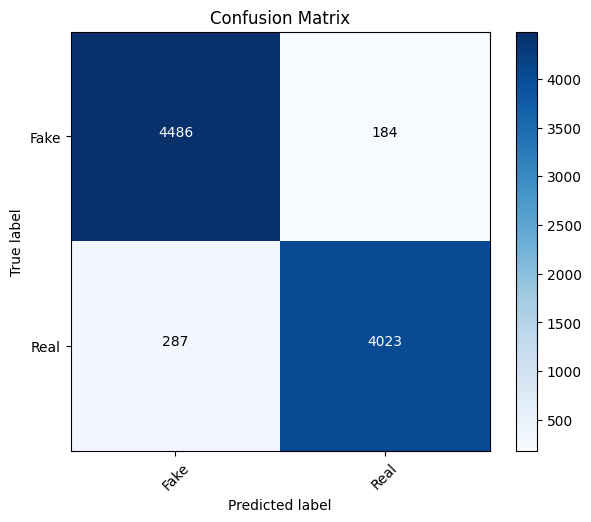

In [25]:
score = accuracy_score(y_test,y_pred)
print("accuracy:%0.3f"% score)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes= ['Fake','Real'])